# logistic regression (multi-dimension)

In [1442]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [1443]:
def make_forge():
    # a carefully hand-designed dataset lol
    X, y = make_blobs(centers=2, random_state=6, n_samples=500)
    y[np.array([7, 27])] = 0
    mask = np.ones(len(X), dtype=np.bool)
    mask[np.array([0, 1, 5, 26])] = 0
    X, y = X[mask], y[mask]
    return X, y

In [1444]:
X, y = make_forge()

In [1445]:
X.shape, y.shape

((496, 2), (496,))

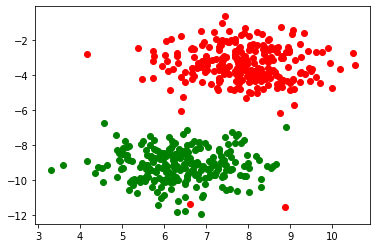

In [1446]:
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='green')

# scikit-learng

In [1447]:
lr = LogisticRegression()

In [1448]:
lr.fit(X, y)

LogisticRegression()

In [1449]:
lr.coef_[0], lr.intercept_

(array([-0.81867172, -1.72416237]), array([-5.27544325]))

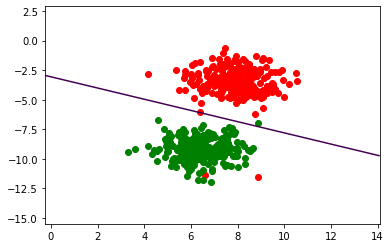

In [1450]:
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='green')

eps = X.std() / 2.
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
xx = np.linspace(x_min, x_max, 1000)
yy = np.linspace(y_min, y_max, 1000)
X1, X2 = np.meshgrid(xx, yy)
X_grid = np.c_[X1.ravel(), X2.ravel()]
decision_values = lr.predict_proba(X_grid)[:, 1]
plt.contour(X1, X2, decision_values.reshape(X1.shape), levels=[0.5])

In [1451]:
decision_values = lr.predict_proba(X_grid)[:, 1]
decision_values

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.43906091e-10, 3.39887882e-10, 3.35916622e-10])

In [1452]:
X_grid

array([[ -0.25290902, -15.5045724 ],
       [ -0.23855305, -15.5045724 ],
       [ -0.22419708, -15.5045724 ],
       ...,
       [ 14.05999092,   2.90268037],
       [ 14.07434688,   2.90268037],
       [ 14.08870285,   2.90268037]])

In [1453]:
t = np.dot(X, lr.coef_[0]) + lr.intercept_
t[:10]

array([-10.25391913,  -7.25951904,  -4.6465376 ,  -4.42112657,
         7.42341411,  -6.92296886,  -6.67261129, -10.13312451,
         4.77411243,  -9.55676278])

In [1454]:
t2 = 1/(1+np.exp(-t))
t2[:10]

array([3.52179609e-05, 7.02951798e-04, 9.50358077e-03, 1.18779020e-02,
       9.99403249e-01, 9.83932484e-04, 1.26349248e-03, 3.97395258e-05,
       9.91625154e-01, 7.07163680e-05])

In [1455]:
len(t2), len(y)

(496, 496)

In [1456]:
t2.reshape

<function ndarray.reshape>

In [1461]:
t2.shape

(496,)

In [1459]:
t2[:10]

array([3.52179609e-05, 7.02951798e-04, 9.50358077e-03, 1.18779020e-02,
       9.99403249e-01, 9.83932484e-04, 1.26349248e-03, 3.97395258e-05,
       9.91625154e-01, 7.07163680e-05])

In [1460]:
(1 - t2).shape

(496,)

In [1462]:
(1-t2)[:10]

array([9.99964782e-01, 9.99297048e-01, 9.90496419e-01, 9.88122098e-01,
       5.96750751e-04, 9.99016068e-01, 9.98736508e-01, 9.99960260e-01,
       8.37484638e-03, 9.99929284e-01])

In [1464]:
x1 = t2

In [1465]:
x2 = 1 - t2

In [1466]:
(x1 + x2)[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [1468]:
y.shape

(496,)

In [1473]:
loss = y*np.log(t2) + (1-y)*np.log(1-t2)
loss.shape, loss[:10]

((496,),
 array([-3.52185810e-05, -7.03198985e-04, -9.54902796e-03, -1.19490079e-02,
        -7.42401103e+00, -9.84416863e-04, -1.26429136e-03, -3.97403154e-05,
        -8.41011245e-03, -7.07188685e-05]))

In [1476]:
-np.sum(loss)

24.810192796579866

# recover without scikit learn

In [1305]:
X.shape

(496, 2)

In [1306]:
X_b = np.c_[np.ones((X.shape[0], 1)), X]

In [1307]:
X_b.shape

(496, 3)

In [1308]:
def step(theta_b, alpha):
    print('theta_b', theta_b)
    t = X_b.dot(theta_b.T)
    p = 1/(1+np.exp(-t))
    d_theta = (y.reshape(-1,1) - p) * X_b / X_b.shape[0]
    
    theta_b += alpha * np.sum(d_theta, axis=0).reshape(1, 3)

    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='green')

    eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    
    X_grid_b = np.c_[np.ones((1000000, 1)), X_grid]
    grid_t = X_grid_b.dot(theta_b.T)
    decision_values = 1-1/(1+np.exp(-grid_t))
    plt.contour(X1, X2, decision_values.reshape(X1.shape), levels=[0.5])

    # t = X_b.dot(theta_b.T)
    # p = 1/(1+np.exp(-t))
    return theta_b, [lr.intercept_, lr.coef_[0]], -(np.sum(y*np.log(p) + (1-y)*np.log(1-p)))/X.shape[0]

In [1309]:
X.shape

(496, 2)

In [1364]:
np.random.seed(3)

In [1365]:
b0 = np.random.randn()
b0

1.7886284734303186

In [1366]:
# b0 = lr.intercept_[0]
b0

1.7886284734303186

In [1367]:
b1 = np.random.randn()
b1

0.43650985051198943

In [1368]:
# b1 = lr.coef_[0][0]
b1

0.43650985051198943

In [1369]:
b2 = np.random.randn()
b2

0.09649746807200862

In [1370]:
# b2 = lr.coef_[0][1]
b2

0.09649746807200862

In [1371]:
theta_b = np.array([b0, b1, b2]).reshape(1, 3)

In [1372]:
theta_b

array([[1.78862847, 0.43650985, 0.09649747]])

In [1373]:
theta_b.shape, y.shape

((1, 3), (496,))

In [1374]:
res_b = X_b.dot(theta_b.T) - y.reshape(-1,1)
res_b[:10]

array([[4.97467325],
       [5.33218832],
       [4.40603182],
       [4.77281757],
       [4.54528507],
       [4.64577434],
       [5.03891684],
       [5.70416899],
       [3.07105088],
       [4.91379032]])

In [1375]:
loss_b = res_b.T.dot(res_b)
loss_b

array([[7863.30872239]])

In [1376]:
theta_a

[array([-5.27544325]), array([-0.81867172, -1.72416237])]

In [1377]:
X_grid.shape

(1000000, 2)

In [1378]:
X_grid[:10]

array([[ -0.25290902, -15.5045724 ],
       [ -0.23855305, -15.5045724 ],
       [ -0.22419708, -15.5045724 ],
       [ -0.20984111, -15.5045724 ],
       [ -0.19548514, -15.5045724 ],
       [ -0.18112918, -15.5045724 ],
       [ -0.16677321, -15.5045724 ],
       [ -0.15241724, -15.5045724 ],
       [ -0.13806127, -15.5045724 ],
       [ -0.12370531, -15.5045724 ]])

theta_b [[ 1.73611543 -0.0081153   0.16443258]]
[array([-5.27544325]), array([-0.81867172, -1.72416237])]
384.3069426568597


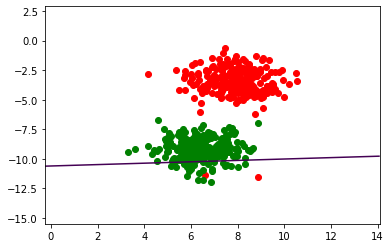

In [1429]:
theta_b, theta_a, loss = step(theta_b, 1.0e-3)
# print(theta_b)
print(theta_a)
print(loss)

In [1430]:
theta_b

array([[ 1.73596351, -0.00965449,  0.16361369]])

In [1431]:
theta_a

[array([-5.27544325]), array([-0.81867172, -1.72416237])]

theta_b [[ 1.73596351 -0.00965449  0.16361369]]
theta_b [[ 1.73594844 -0.00980749  0.16353123]]
theta_b [[ 1.73593337 -0.0099604   0.16344873]]
theta_b [[ 1.73591832 -0.01011322  0.16336616]]
theta_b [[ 1.73590328 -0.01026595  0.16328355]]
theta_b [[ 1.73588826 -0.01041858  0.16320087]]
theta_b [[ 1.73587324 -0.01057113  0.16311815]]
theta_b [[ 1.73585824 -0.01072359  0.16303537]]
theta_b [[ 1.73584324 -0.01087596  0.16295253]]
theta_b [[ 1.73582826 -0.01102824  0.16286964]]
theta_b [[ 1.73581329 -0.01118043  0.1627867 ]]
theta_b [[ 1.73579834 -0.01133254  0.16270371]]
theta_b [[ 1.73578339 -0.01148455  0.16262066]]
theta_b [[ 1.73576845 -0.01163647  0.16253755]]
theta_b [[ 1.73575353 -0.0117883   0.1624544 ]]
theta_b [[ 1.73573862 -0.01194005  0.16237119]]
theta_b [[ 1.73572372 -0.01209171  0.16228793]]
theta_b [[ 1.73570883 -0.01224327  0.16220461]]
theta_b [[ 1.73569395 -0.01239475  0.16212124]]
theta_b [[ 1.73567908 -0.01254614  0.16203782]]
[[ 1.73566422 -0.01269745  0.16195435]] 

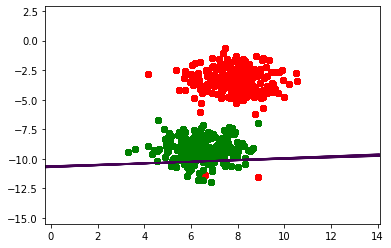

In [1432]:
for i in range(20):
    theta_b, theta_a, loss = step(theta_b, 1.0e-4)
print(theta_b, theta_a, loss)

theta_b [[ 1.73566422 -0.01269745  0.16195435]]
theta_b [[ 1.73566274 -0.01271257  0.161946  ]]
theta_b [[ 1.73566126 -0.01272769  0.16193764]]
theta_b [[ 1.73565977 -0.01274281  0.16192929]]
theta_b [[ 1.73565829 -0.01275793  0.16192094]]
theta_b [[ 1.7356568  -0.01277304  0.16191258]]
theta_b [[ 1.73565532 -0.01278816  0.16190423]]
theta_b [[ 1.73565384 -0.01280328  0.16189587]]
theta_b [[ 1.73565235 -0.01281839  0.16188752]]
theta_b [[ 1.73565087 -0.01283351  0.16187916]]
[[ 1.73564938 -0.01284862  0.1618708 ]] [array([-5.27544325]), array([-0.81867172, -1.72416237])] 382.36144519056126


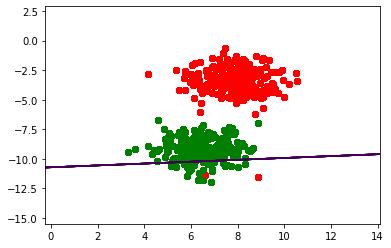

In [1433]:
for i in range(10):
    theta_b, theta_a, loss = step(theta_b, 1.0e-5)
print(theta_b, theta_a, loss)

theta_b [[ 1.73564938 -0.01284862  0.1618708 ]]
theta_b [[ 1.73564924 -0.01285013  0.16186997]]
theta_b [[ 1.73564909 -0.01285164  0.16186913]]
theta_b [[ 1.73564894 -0.01285316  0.16186829]]
theta_b [[ 1.73564879 -0.01285467  0.16186746]]
theta_b [[ 1.73564864 -0.01285618  0.16186662]]
theta_b [[ 1.73564849 -0.01285769  0.16186579]]
theta_b [[ 1.73564835 -0.0128592   0.16186495]]
theta_b [[ 1.7356482  -0.01286071  0.16186412]]
theta_b [[ 1.73564805 -0.01286222  0.16186328]]
[[ 1.7356479  -0.01286373  0.16186244]] [array([-5.27544325]), array([-0.81867172, -1.72416237])] 382.34984358210517


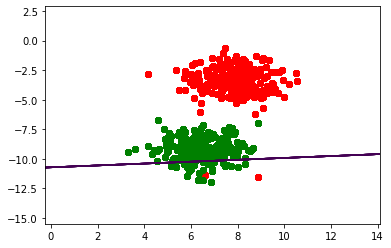

In [1434]:
for i in range(10):
    theta_b, theta_a, loss = step(theta_b, 1.0e-6)
print(theta_b, theta_a, loss)

In [1437]:
t = X_b.dot(theta_b.T)
t[:10]

array([[ 1.53535253],
       [ 1.13365446],
       [ 1.06745312],
       [ 0.95916455],
       [-0.25277003],
       [ 1.25536472],
       [ 1.1383609 ],
       [ 1.35493569],
       [ 0.138899  ],
       [ 1.47492536]])

In [1438]:
t2 = 1/(1+np.exp(-t))
t2[:10]

array([[0.8227881 ],
       [0.75651269],
       [0.74411227],
       [0.7229545 ],
       [0.43714182],
       [0.77822714],
       [0.75737857],
       [0.79493538],
       [0.53466903],
       [0.81380486]])

In [1439]:
len(t2), len(y)

(496, 496)

In [1440]:
-(np.sum(y*np.log(t2) + (1-y)*np.log(1-t2)))/X.shape[0]

382.34923309748194

In [1441]:
t2.shape

(496, 1)